In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

dataSet = pd.read_csv(
    "C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/Week6  Nerual Network/ResampledTime/req_resampledTime_x.csv")
for i in dataSet.columns:
    print(i)

RSN
0
0.206896552
0.413793103
0.620689655
0.827586207
1.034482759
1.24137931
1.448275862
1.655172414
1.862068966
2.068965517
2.275862069
2.482758621
2.689655172
2.896551724
3.103448276
3.310344828
3.517241379
3.724137931
3.931034483
4.137931034
4.344827586
4.551724138
4.75862069
4.965517241
5.172413793
5.379310345
5.586206897
5.793103448
6
Earthquake Magnitude
Hypocenter Depth (km)
Joyner-Boore Dist. (km)
Vs30 (m/s) selected for analysis
PGA (g)
PGV (cm/sec)
T0.010S


In [2]:


Xreq = dataSet[["Earthquake Magnitude",
                "Hypocenter Depth (km)", "Joyner-Boore Dist. (km)", "Vs30 (m/s) selected for analysis"]]

# Yreq = dataSet[["0.401606426", "0.903614458", "1.40562249", "1.907630522", "2.409638554", "2.911646586", "3.413654618", "3.915662651", "4.417670683", "4.919678715", "5.421686747", "5.923694779", "6.425702811", "6.927710843", "7.429718876", "7.931726908", "8.43373494", "8.935742972", "9.437751004", "9.939759036", "10.44176707", "10.9437751", "11.44578313", "11.94779116", "12.4497992", "12.95180723", "13.45381526", "13.95582329", "14.45783133", "14.95983936", "15.46184739", "15.96385542", "16.46586345", "16.96787149", "17.46987952", "17.97188755", "18.47389558", "18.97590361", "19.47791165", "19.97991968", "20.48192771", "20.98393574", "21.48594378", "21.98795181", "22.48995984", "22.99196787", "23.4939759", "23.99598394", "24.49799197", "25"
#                   ]]

Yreq = dataSet[["0", "0.206896552", "0.413793103", "0.620689655", "0.827586207", "1.034482759", "1.24137931", "1.448275862", "1.655172414", "1.862068966", "2.068965517", "2.275862069", "2.482758621", "2.689655172", "2.896551724", "3.103448276", "3.310344828", "3.517241379", "3.724137931", "3.931034483", "4.137931034", "4.344827586", "4.551724138", "4.75862069", "4.965517241", "5.172413793", "5.379310345", "5.586206897", "5.793103448", "6"
               ]]

# Yreq = dataSet[["0.401606426"]]

# Yreq_log10 = np.log10(Yreq)


scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

# Yreq_log10
features = scalerX.fit_transform(Xreq)
target = scalerY.fit_transform(Yreq)

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Create the random forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(x_train, y_train)

# Make predictions
# Convert the prediction and actual dataframes to numpy arrays
y2_pred = model_rf.predict(x_test)
y1_pred= model_rf.predict(x_train)

print(
    f'Mean Squared Error for Training: {mean_squared_error(y_train,y1_pred )}')
print(
    f'Mean Squared Error for Test: {mean_squared_error(y_test, y2_pred)}')
print("R2-Score for Train:", r2_score(y1_pred, y_train))
print("R2-Score for Test:", r2_score(y2_pred, y_test))


Mean Squared Error for Training: 3.877123126509629e-05
Mean Squared Error for Test: 0.00032969066578721333
R2-Score for Train: 0.5998433310485548
R2-Score for Test: -78.9315932075306


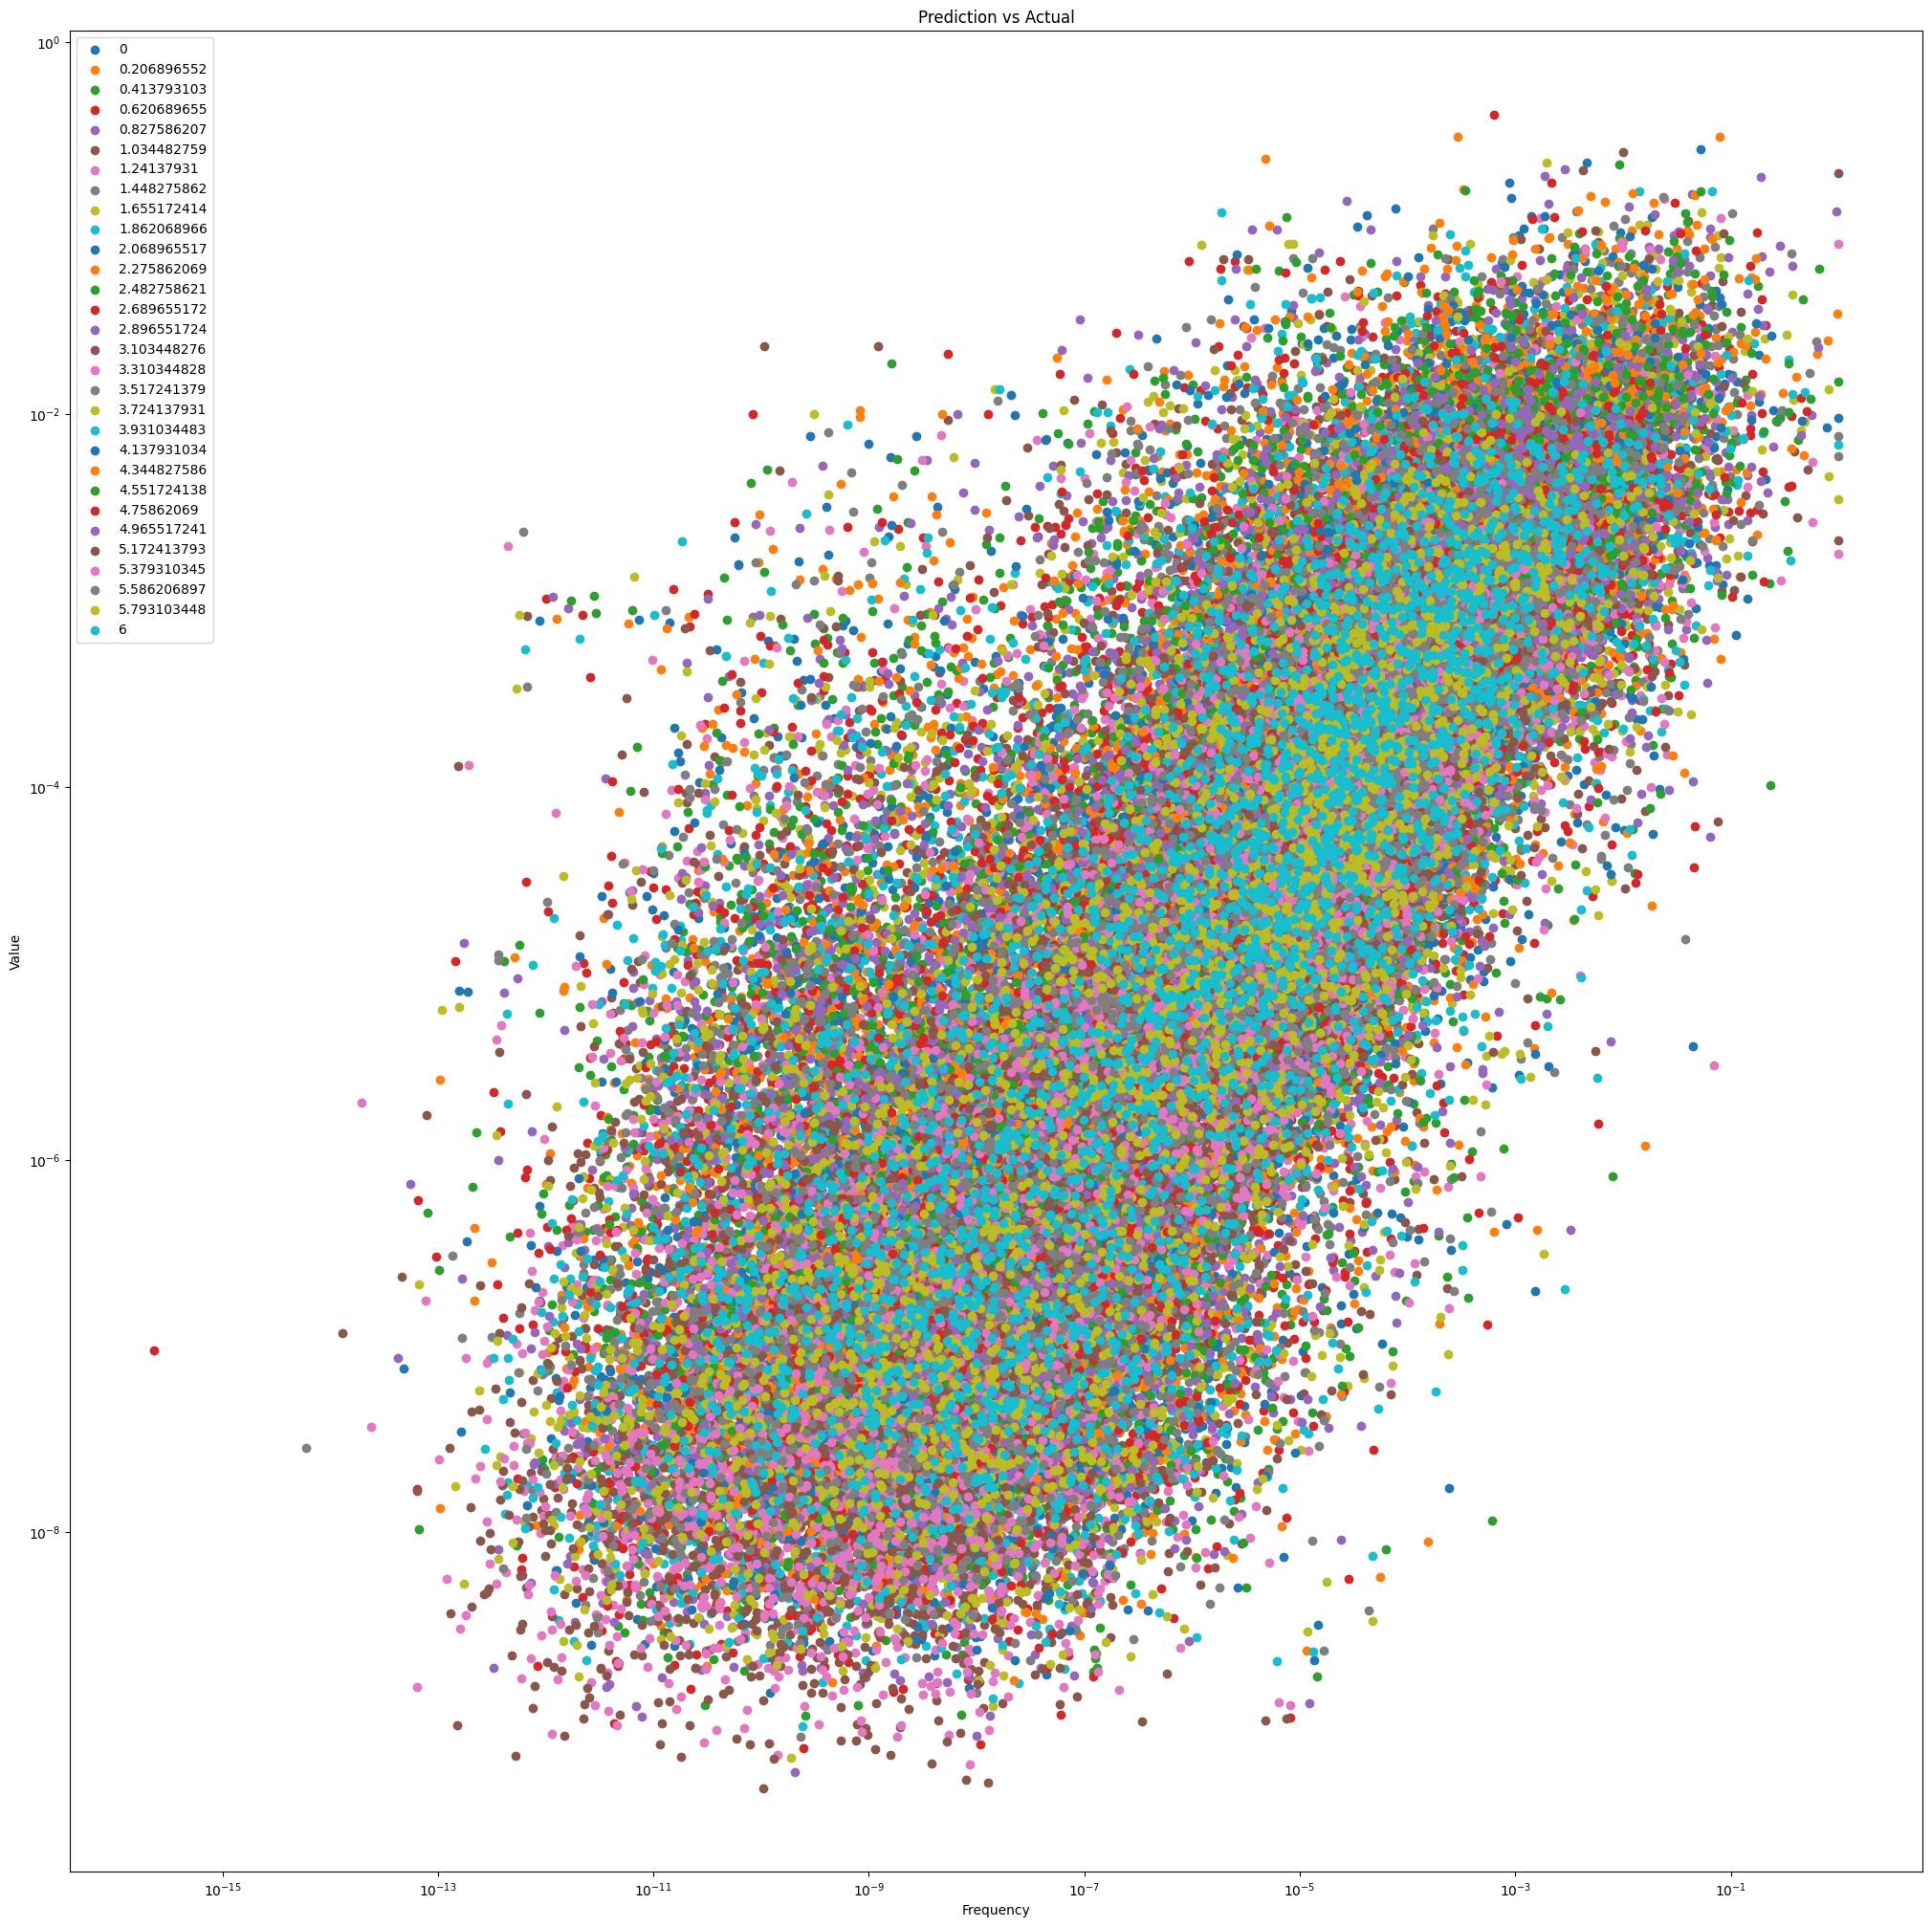

In [4]:
y_actual = y_test

y_test= pd.DataFrame(y_test,columns=Yreq.columns)
predictions_df= pd.DataFrame(y2_pred,columns=Yreq.columns)
Fseries=list(predictions_df.columns)

# Plot the prediction vs actual plot
plt.figure(figsize=(25, 25))

for i in Fseries:
    plt.scatter(y_test[i], predictions_df[i], label=i)
# plt.plot(Fseries, y_test.iloc[0], label='Prediction')
# plt.plot(Fseries, y_actual.iloc[0], label='Actual')
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.xscale('log')
plt.yscale('log')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()

Mean Squared Error for Training: 2.4314606203185104e-06
Mean Squared Error for Test: 0.00045659913826884963
Mean Absolute Error for Training: 3.060339038742441e-05
Mean Absolute Error for Test: 0.0021612228871707275
R2-Score for Training: 0.9924651791722956
R2-Score for Test: -0.6752766469610537


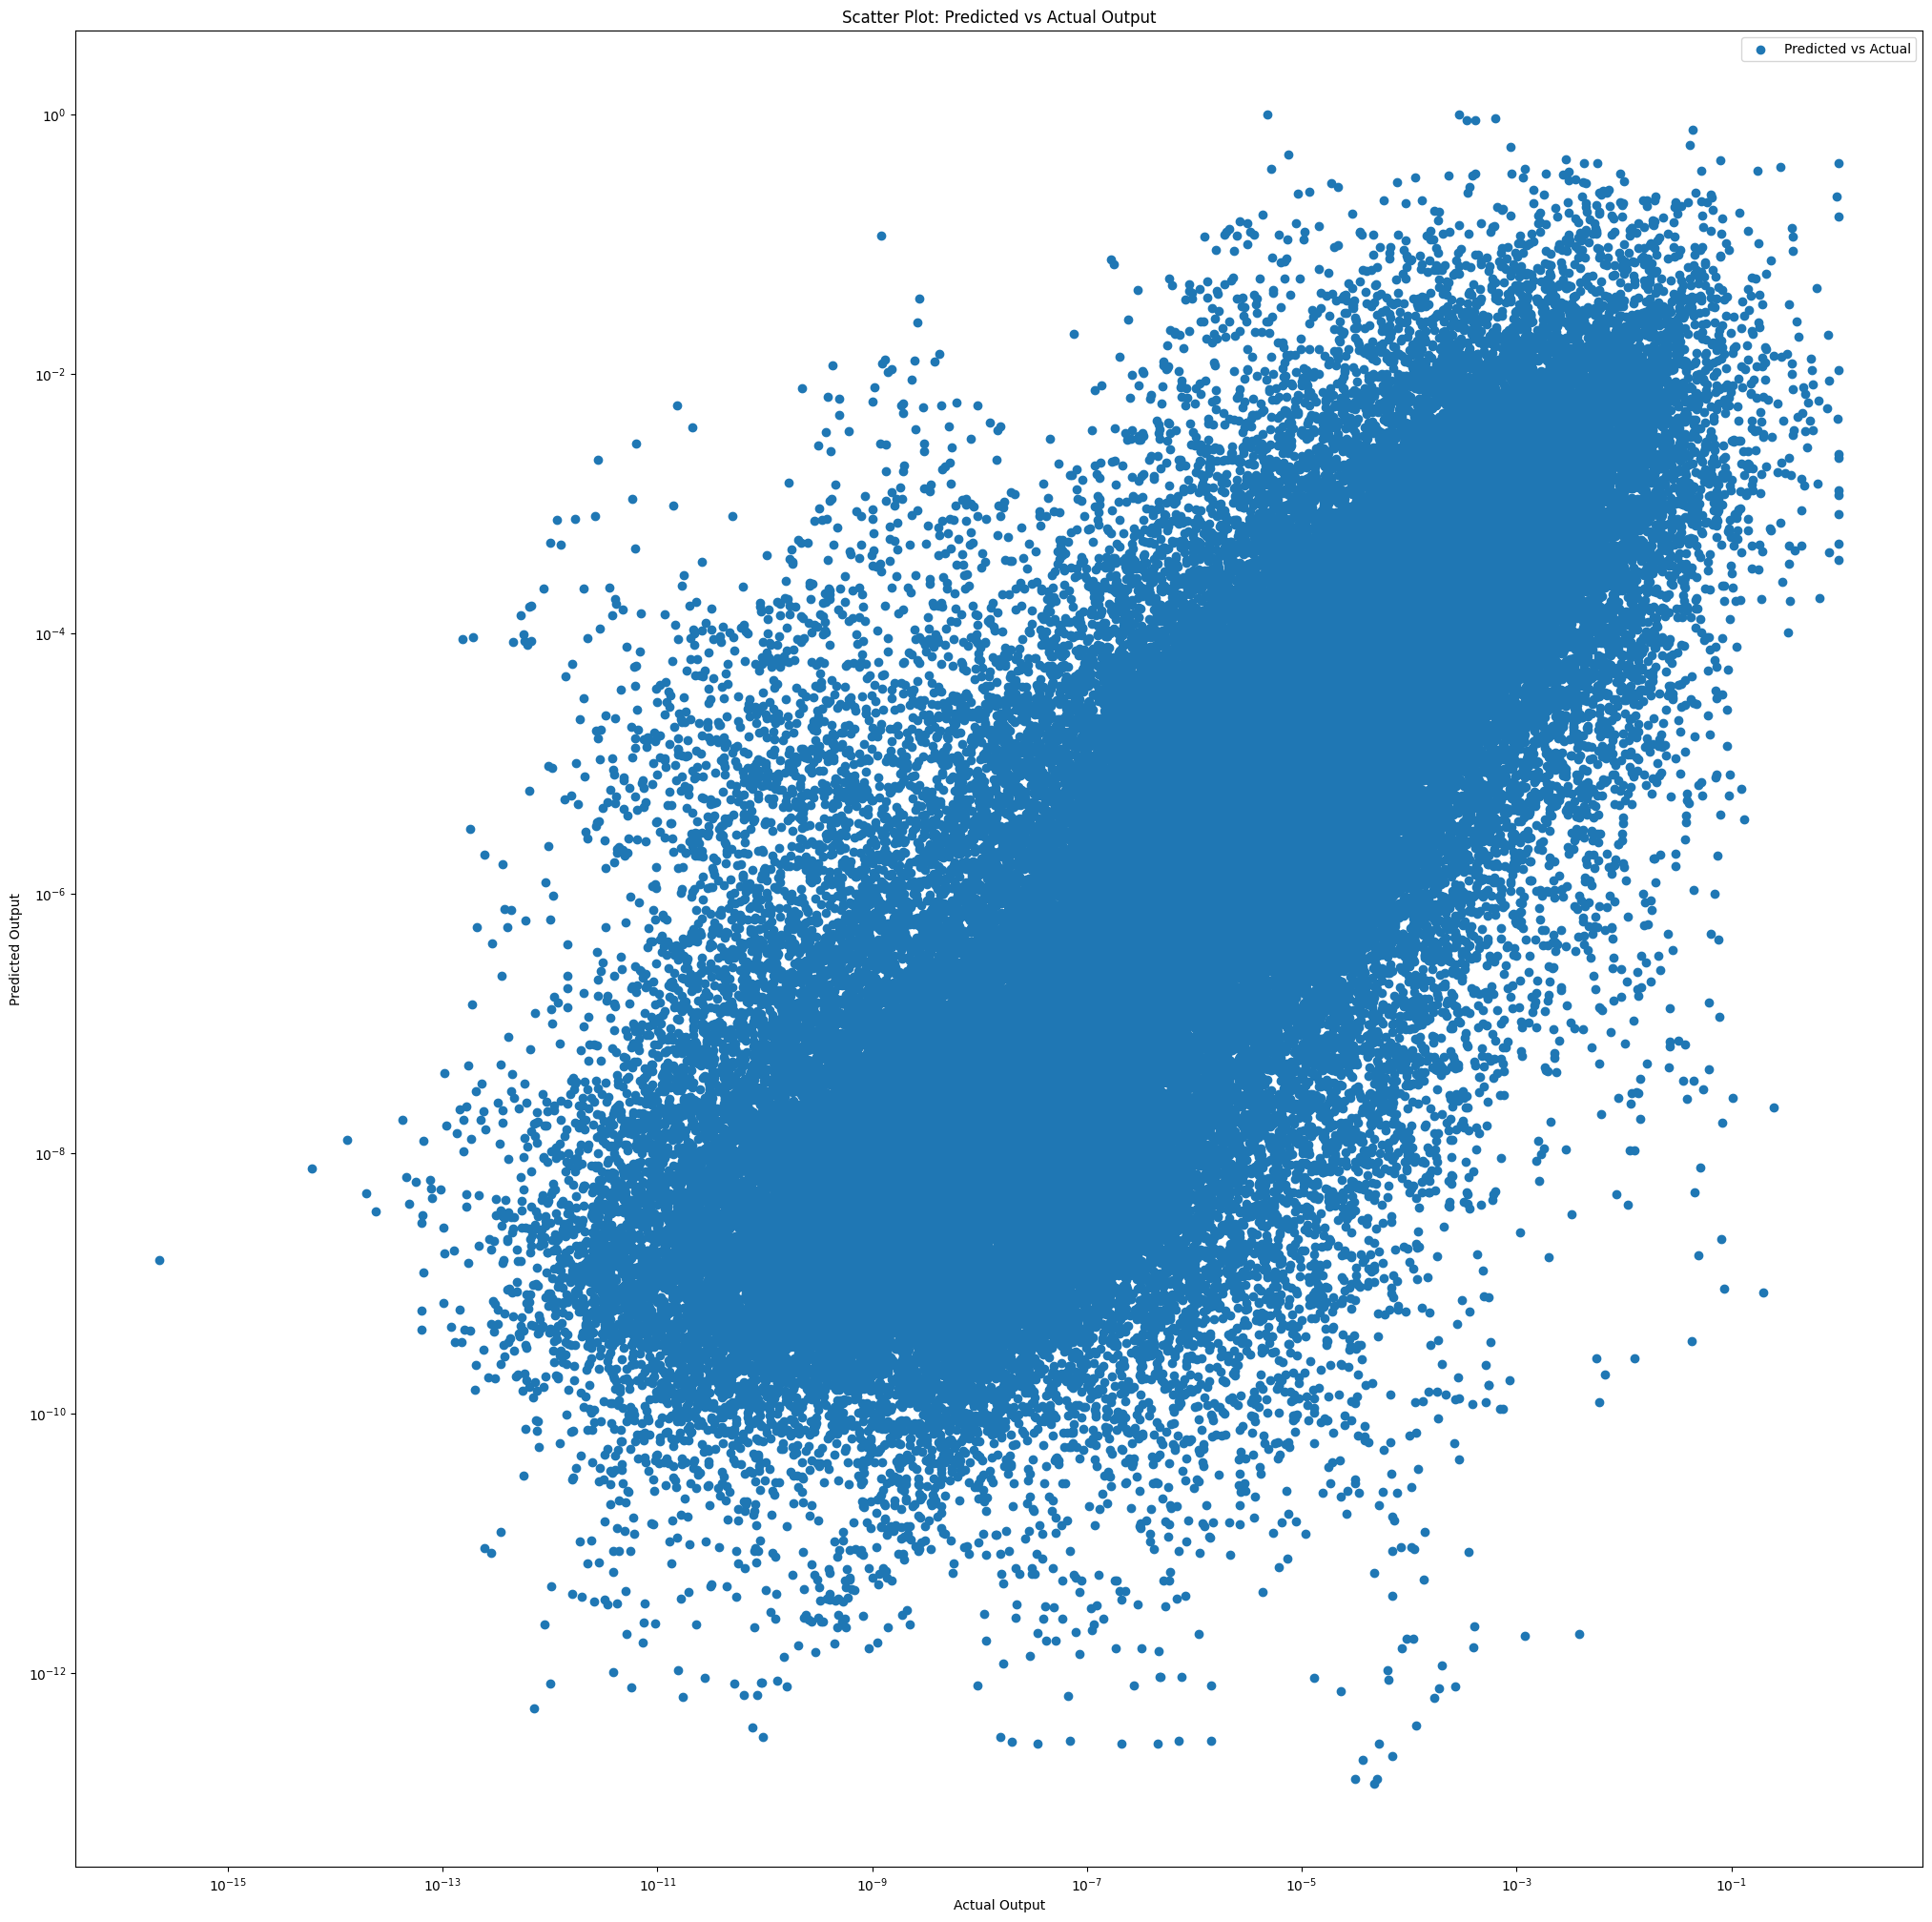

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Create the decision tree regression model
model_dt = DecisionTreeRegressor(random_state=42)

# Train the model
model_dt.fit(x_train, y_train)

# Make predictions
y_pred_train = model_dt.predict(x_train)
y_pred_test = model_dt.predict(x_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error for Training: {mse_train}")
print(f"Mean Squared Error for Test: {mse_test}")
print(f"Mean Absolute Error for Training: {mae_train}")
print(f"Mean Absolute Error for Test: {mae_test}")
print(f"R2-Score for Training: {r2_train}")
print(f"R2-Score for Test: {r2_test}")

# Plot scatter plot of predicted vs actual output values
plt.figure(figsize=(25, 25))
plt.scatter(y_test, y_pred_test, label='Predicted vs Actual')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Scatter Plot: Predicted vs Actual Output')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
